In [3]:
# Importanweisungen

import numpy as num
import scipy as sci
import sympy as sym
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.axes as axes
import math
from scipy import optimize
import uncertainties as unc
import uncertainties.unumpy as unp 
unv=unp.nominal_values
usd=unp.std_devs

In [4]:
# Konstanten fuer einheitliche Darstellung

fig_size = (10, 6)
fig_legendsize = 14
fig_labelsize = 12

In [5]:
# allgemeine Fitfunktionen

def linear(x,m): # lineare Funktion mit f(x) = m * x 
    return(m*x)

def gerade(x, m, b): # gerade mit = f(x) = m * x + b
    return (m*x + b)

def cyclic(x, a, f, phi):
    return a * num.sin(x * f - phi)

def cyclicOff(x, a, f, phi, offset):
    return cyclic(x, a, f, phi) + offset

# fittet ein dataset mit gegebenen x und y werten, eine funktion und ggf. anfangswerten und y-Fehler
# gibt die passenden parameter der funktion, sowie dessen unsicherheiten zurueck
#
# https://stackoverflow.com/questions/14581358/getting-standard-errors-on-fitted-parameters-using-the-optimize-leastsq-method-i#
# Updated on 4/6/2016
# User: https://stackoverflow.com/users/1476240/pedro-m-duarte
def fit_curvefit(datax, datay, function, p0=None, yerr=None, **kwargs):

    pfit, pcov = \
         optimize.curve_fit(function,datax,datay,p0=p0,\
                            sigma=yerr, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append(num.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = num.array(error)
    return pfit_curvefit, perr_curvefit 

# usage zB:
# pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [1, 0])
# fuer eine gerade mit anfangswerten m = 1, b = 0

In [6]:
# gibt Daten fuer LaTeX bereitgestellt aus

def latex_printValue(val, file):
    f = open('data/%s.txt' % file, 'w')
    f.write(str(val).replace('/', ''))

In [171]:
# weitere Werte, Konstanten
# Werte von https://physics.nist.gov/cuu/Constants/index.html[0]
# Wasser eigenschaften: https://webbook.nist.gov/cgi/inchi/InChI%3D1S/H2O/h1H2
# https://www.engineeringtoolbox.com/water-thermal-properties-d_162.html

c = 299792458 # m/s
k_B = unc.ufloat_fromstr("1.38064852(79)e-23") # J K-1 [0]
h = unc.ufloat_fromstr("4.135667662(25)e-15") # eV s [0]
r_e = unc.ufloat_fromstr("2.8179403227(19)e-15") # m [0]
R = unc.ufloat_fromstr("8.3144598(48)") # J mol-1 K-1 [0]
K = 273.15 # kelvin 
g = 9.81 # m/s^2

In [164]:
# import der messwerte

unc_d = 0.05 / 2 / num.sqrt(6) # analog in mm
unc_tReact = 0.1 / 2 / num.sqrt(6) # analog in s
unc_tUhr = 0.1 / 2 / num.sqrt(3) # digital in s
unc_t = num.sqrt(unc_tReact**2 + unc_tUhr**2) # s
unc_h = 0.1/ 2 / num.sqrt(6) # analog in cm
unc_waage = 0.1 / 2 / num.sqrt(3) # digital in g
unc_druck = 0.1 / 2 / num.sqrt(6) # analog in mb
unc_V = 10 / 2 / num.sqrt(6) # analog in cm3

h0 = unc.ufloat(40.5, unc_h) # ruhehoehe in cm
h1 = unc.ufloat(40.3, unc_h) # ruhehoehe geraet 1

con = {}
for i in range(0,50):
    con[i] = lambda s: float(s if len(s) > 0 else 0)

data = num.loadtxt("messung/schwingungLuft.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
luft = num.array([unp.uarray(data[:,0], unc_d), unp.uarray(data[:,1], unc_t)]) # erste Spalte spaltdicke, zweite spalte zeit fuer 100 schwingungen

data = num.loadtxt("messung/schwingungArgon.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
argon = num.array([unp.uarray(data[:,0], unc_d), unp.uarray(data[:,1], unc_t)]) # erste Spalte spaltdicke, zweite spalte zeit fuer 100 schwingungen

data = num.loadtxt("messung/schwingungCO2.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
co2 = num.array([unp.uarray(data[:,0], unc_d), unp.uarray(data[:,1], unc_t)]) # erste Spalte spaltdicke, zweite spalte zeit fuer 100 schwingungen

data = num.loadtxt("messung/pumpe1.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
pumpe1 = unp.umatrix(data, unc_h) # erste Spalte hoehe1, zweite spalte hoehe3

data = num.loadtxt("messung/pumpe2.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
pumpe2 = unp.umatrix(data, unc_h) # erste Spalte hoehe1, zweite spalte hoehe3

data = num.loadtxt("messung/pumpe3.txt", skiprows = 1, usecols = (0, 1), delimiter = "\t", converters = con)
pumpe3 = unp.umatrix(data, unc_h) # erste Spalte hoehe1, zweite spalte hoehe3

d = unc.ufloat(15.90,unc_d)/10 # durchmesser in 10mm
h_rohr = unc.ufloat(18.00, unc_h) # hoehe rohr bis schlitz in cm
V0 = unc.ufloat(5450, unc_V) # volumen flasche in cm3
m = unc.ufloat(7.28, unc_waage) # gewicht schwingkörper in g
pL = unc.ufloat(1008.7, unc_druck) # aussendruck in mb = 100 Pa = 1000 g/cm/s2

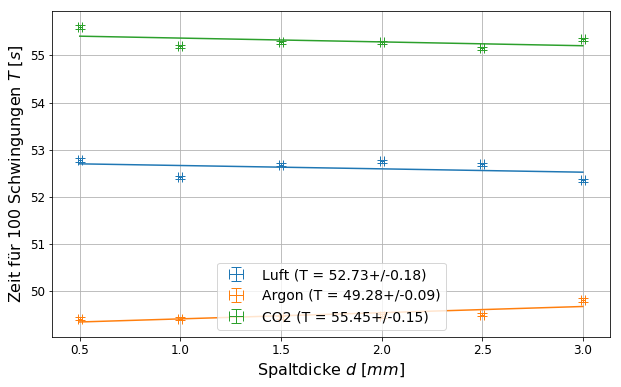

In [165]:
# diagramm: gase mit y-achsenabschnitt

fig=plt.figure(figsize=fig_size)

xdata, ydata = luft
pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [0, 50])
p = unp.uarray(pfit, perr)
plot = plt.plot(unv(xdata), gerade(unv(xdata), *pfit))
plt.setp(plot, color='tab:blue')
T_luft = p[1] # achsenabschnitt speichern
plot = plt.errorbar(unv(xdata),unv(ydata),usd(ydata),usd(xdata),fmt=' ', capsize=5, linewidth=1, label='Luft (T = %s)' % (T_luft))
plt.setp(plot, color='tab:blue')

xdata, ydata = argon
pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [0, 50])
p = unp.uarray(pfit, perr)
plot = plt.plot(unv(xdata), gerade(unv(xdata), *pfit))
plt.setp(plot, color='tab:orange')
T_argon = p[1] # achsenabschnitt speichern
plot = plt.errorbar(unv(xdata),unv(ydata),usd(ydata),usd(xdata),fmt=' ', capsize=5, linewidth=1, label='Argon (T = %s)' % (T_argon))
plt.setp(plot, color='tab:orange')

xdata, ydata = co2
pfit, perr = fit_curvefit(unv(xdata), unv(ydata), gerade, yerr = usd(ydata), p0 = [0, 50])
p = unp.uarray(pfit, perr)
plot = plt.plot(unv(xdata), gerade(unv(xdata), *pfit))
plt.setp(plot, color='tab:green')
T_co2 = p[1] # achsenabschnitt speichern
plot = plt.errorbar(unv(xdata),unv(ydata),usd(ydata),usd(xdata),fmt=' ', capsize=5, linewidth=1, label='CO2 (T = %s)' % (T_co2))
plt.setp(plot, color='tab:green')

# plt.xlim(0,3)
plt.legend(prop={'size':fig_legendsize})
plt.grid()
plt.tick_params(labelsize=fig_labelsize)
plt.xlabel("Spaltdicke $d$ [$mm$]", {'fontsize':fig_legendsize+2})
plt.ylabel("Zeit für 100 Schwingungen $T$ [$s$]", {'fontsize': fig_legendsize+2})
plt.savefig("data/linearisierungen.pdf")
plt.show()

In [173]:
# Rechnung Rueckhard Flamersfeld

r = d/2
A = math.pi * r**2
V = V0 + A * h_rohr
T = num.array([T_luft, T_argon, T_co2])
p0 = pL + m * g / A / 100

k_s = 4 * math.pi**2 * m * V / p0 / A**2 / (T/100)**2 / 1000 # m[g], V[cm3], p0[mb], A2[cm4], T2[s2]
# [k] = 1/mb * g / cm s2 = 1/1000 

latex_printValue(k_s[0], "kappaLuft")
latex_printValue(k_s[1], "kappaArgon")
latex_printValue(k_s[2], "kappaCO2")
latex_printValue(A, "querschnitt_cm2")
k_s

array([1.4251474728440496+/-0.011728172845272593,
       1.6321444492785027+/-0.009930479356980255,
       1.2890181184456304+/-0.009115007650978401], dtype=object)

In [174]:
# Rechnung Clement Desormes

k1 = (pumpe1 - h0) * 2 # differenz beider saeulen
k2 = (pumpe2 - h0) * 2 # differenz beider saeulen
k3 = (pumpe3 - h1) * 2 # differenz beider saeulen

k = num.array([k1, k2, k3])
w = k[:,:,0] / (k[:,:,0] - k[:,:,1])

i = 1
for cell in w:
    j = 1
    latex_printValue(num.mean(cell), "kappaPumpeMean_%s" % (i))
    for cell2 in cell:
        latex_printValue(cell2, "kappaPumpe_%s_%s" % (i, j))
        j = j + 1
    i = i + 1